<a href="https://colab.research.google.com/github/razan-wari/Gaza-Sky-Geeks/blob/main/House_Rent_17Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [40]:
dataset = pd.read_csv('/content/House Rent.csv')
dataset.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,5/13/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,5/16/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,7/4/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,5/9/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [41]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

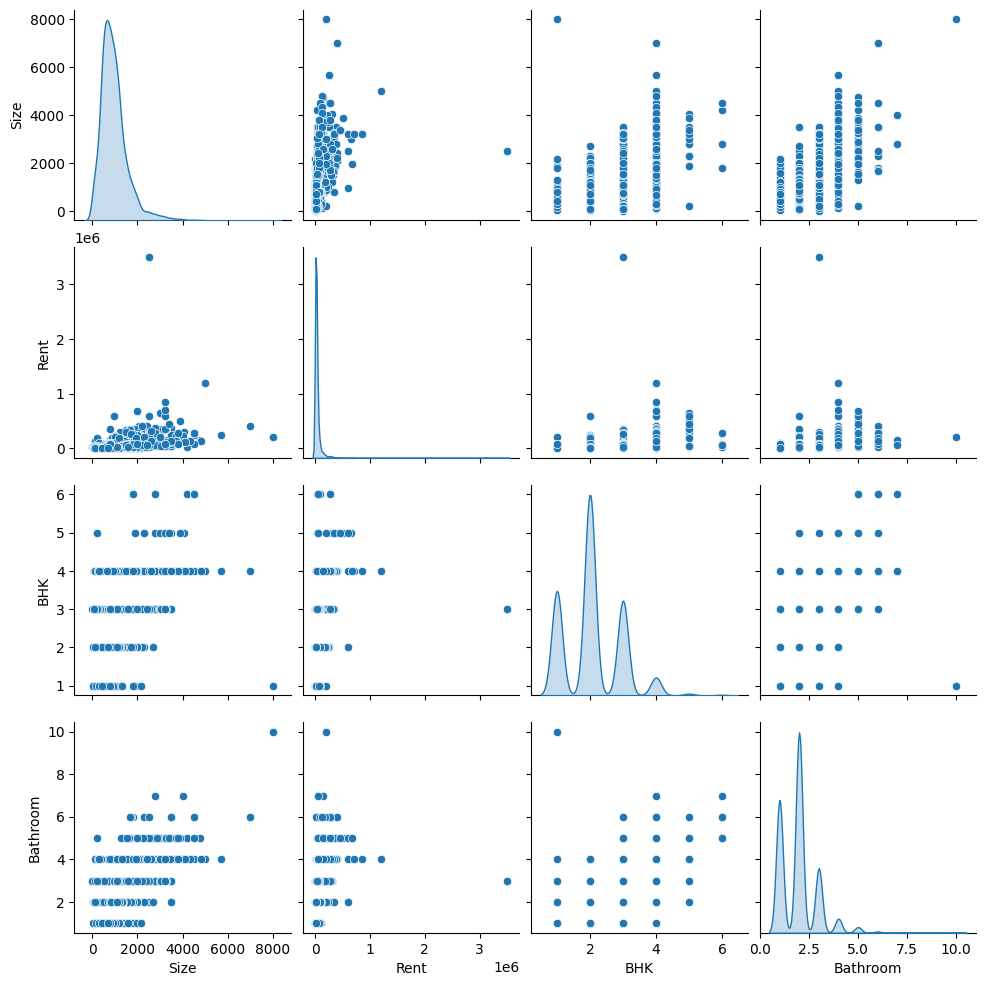

In [42]:

sns.pairplot(train_dataset[["Size", "Rent", "BHK", "Bathroom"]], diag_kind="kde")

In [43]:
train_stats = train_dataset.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
BHK,3797.0,2.078746,0.833230,1.0,2.0,2.0,3.0,6.0
Rent,3797.0,35056.161180,82011.114304,1200.0,10000.0,15500.0,32000.0,3500000.0
Size,3797.0,962.716882,630.120964,10.0,550.0,850.0,1200.0,8000.0
Bathroom,3797.0,1.961022,0.895521,1.0,1.0,2.0,2.0,10.0


<BarContainer object of 4746 artists>

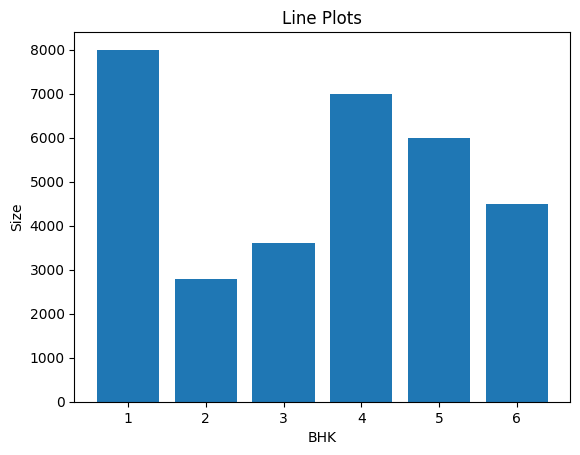

In [44]:
x = dataset['BHK']

y = dataset['Size']

plt.xlabel('BHK')

plt.ylabel('Size')

plt.title('Line Plots')
plt.bar( x, y )

<BarContainer object of 4746 artists>

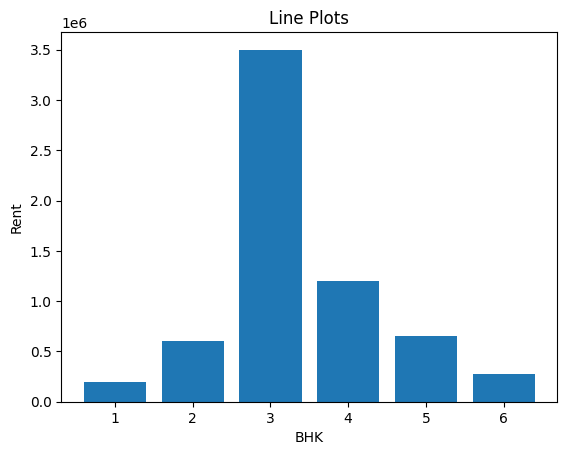

In [45]:
x = dataset['BHK']

y = dataset['Rent']

plt.xlabel('BHK')

plt.ylabel('Rent')

plt.title('Line Plots')
plt.bar( x, y )

<BarContainer object of 4746 artists>

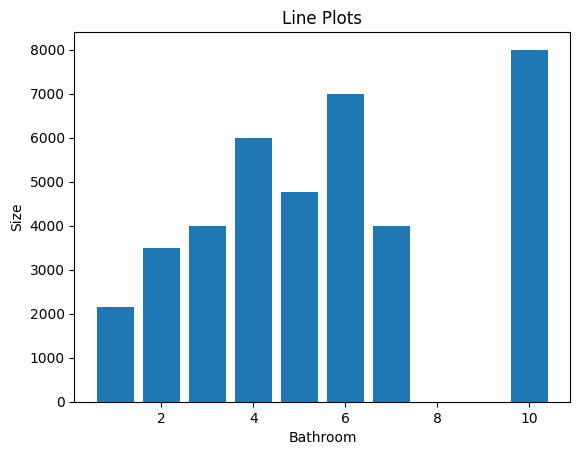

In [46]:
x = dataset['Bathroom']

y = dataset['Size']

plt.xlabel('Bathroom')

plt.ylabel('Size')

plt.title('Line Plots')
plt.bar( x, y )

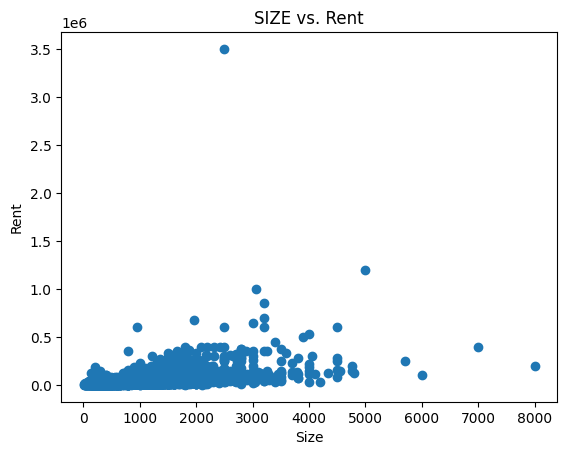

In [47]:
plt.scatter(dataset["Size"], dataset["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("SIZE vs. Rent")
plt.show()


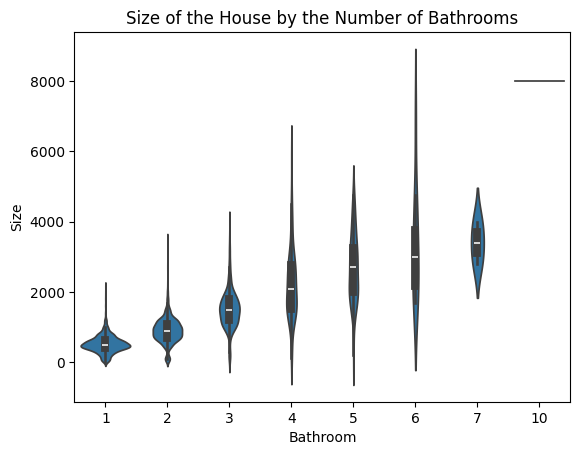

In [48]:
sns.violinplot(x="Bathroom", y="Size", data=dataset)


plt.title("Size of the House by the Number of Bathrooms")


plt.show()

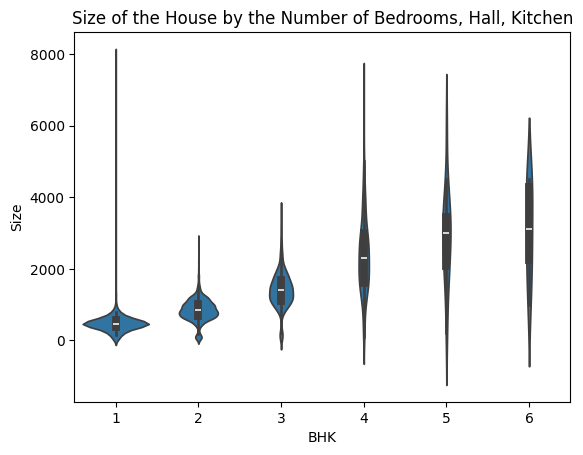

In [49]:
sns.violinplot(x="BHK", y="Size", data=dataset)


plt.title("Size of the House by the Number of Bedrooms, Hall, Kitchen")


plt.show()

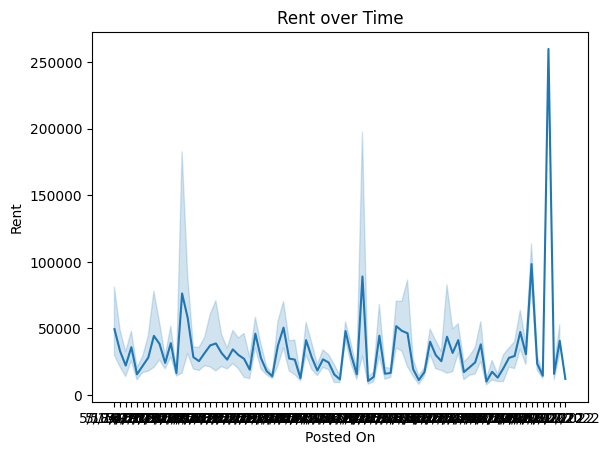

In [50]:

sns.lineplot(x="Posted On", y="Rent", data=dataset)


plt.title("Rent over Time")
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define the input and output variables
X = dataset[["Rent", "Size"]]
y = dataset["BHK"]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.303437789385921
R-squared: 0.5318958934732811


In [52]:
from sklearn.neighbors import KNeighborsRegressor



# Define the input and output variables
X = dataset[["Size", "Rent"]]
y = dataset["BHK"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.2461894736842105
R-squared: 0.6202111020896542
